<a href="https://colab.research.google.com/github/arovelli/MLPNS_ARovelli/blob/main/ShallowNN_ARovelli1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pylab as pl

In [5]:
X = np.array([[0,0,1], [1,1,1], [1,0,1],[0,1,1]])

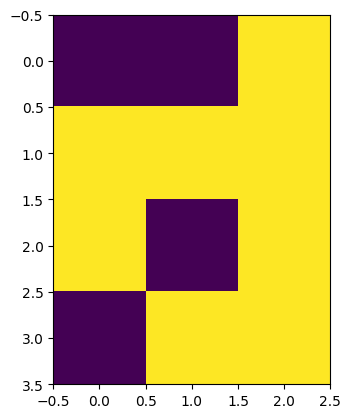

In [6]:
pl.imshow(X)

In [7]:
y = np.array([[0,1,1,0]]).T

In [8]:
def sigmoid(x):
  return 1. / (1. + np.exp(-x))

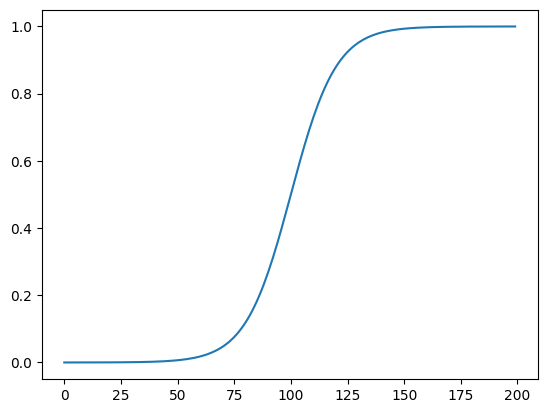

In [9]:
pl.plot(sigmoid(np.arange(-10,10,0.1)))

In [10]:
def loss(prediction, target):
  return target - prediction

In [11]:
def dsigmoid(s):
  return s * (1. - s)

In [12]:
np.random.seed(302)
training = 6000

In [13]:
syn0 = 2 * np.random.random((3,1)) - 1
syn0.shape

(3, 1)

In [19]:
loss_output = []

for iter in range(training): 
  inputLayer = X 

  # forward propagation 
  # linear regression 
  l1 = np.dot(inputLayer, syn0)
  #activations
  
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  #calculate correction
  output_delta = output_error * dsigmoid(output)
  #apply correction to weights 
  syn0 += np.dot(inputLayer.T, output_delta) 
  #inserire layer tra input e output si chiama backpropagation

print('outpur after training\n', output)
print('output target\n', y)
     

outpur after training
 [[0.00880859]
 [0.9928168 ]
 [0.9941551 ]
 [0.00716966]]
output target
 [[0]
 [1]
 [1]
 [0]]


Text(0, 0.5, 'Global loss')

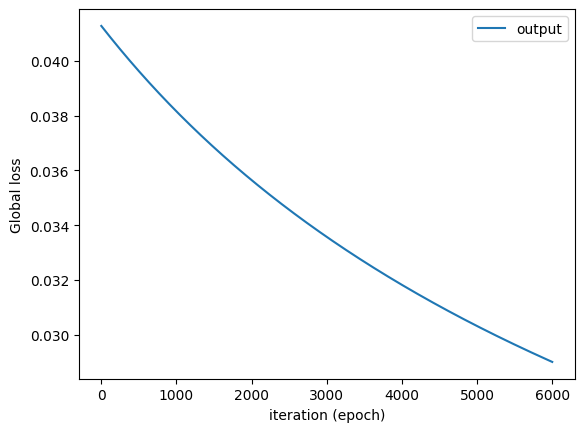

In [20]:
pl.plot(loss_output, label='output')
pl.legend()
pl.xlabel('iteration (epoch)')
pl.ylabel('Global loss')
     


##double hidden layer

In [21]:
np.random.seed(302)

syn0 = 2 * np.random.random((3, 5)) - 1 #normalized 0-1 
#syn0 è il vettore dei pesi
syn0.shape
print(syn0)

syn1=2 * np.random.random((5,1)) - 1

loss_output = []
loss_hidden = []

for iter in range(training): 
  inputLayer = X 

  l1 = np.dot(inputLayer, syn0)
  hidden=sigmoid(l1)
  hidden_error = loss(hidden, y)
  loss_hidden.append(np.abs(hidden_error).sum())
  hidden_delta=hidden_error * dsigmoid(hidden)

  syn0 += np.dot(inputLayer.T, hidden_delta)

  l2 = np.dot(hidden, syn1)
  output = sigmoid(l2)

  outpur_error=loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  output_delta = output_error * dsigmoid(output)

  syn1 += np.dot(hidden.T, output_delta)

  

[[ 0.27256242  0.65008468 -0.31671053  0.47927851 -0.06168623]
 [ 0.08558127  0.09133313 -0.7367975  -0.69357809 -0.48670618]
 [-0.12373802 -0.92147466  0.52732938  0.65817185 -0.50538898]]


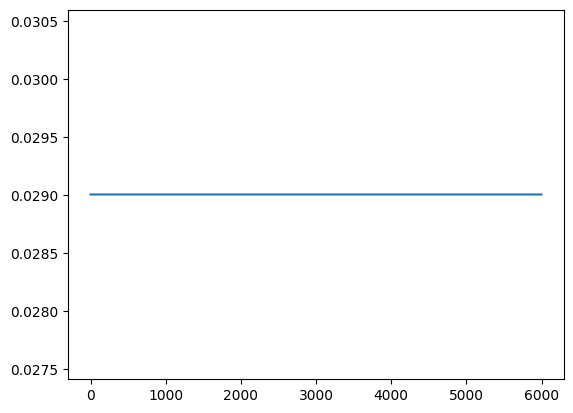

In [22]:
pl.plot(loss_output)